# Introdução à análise exploratória

## Quais dados vamos explorar?


Para dar uma breve ideia sobre o conjunto de dados, ele contém 11.914 linhas e 16 colunas, que incluem características de carros, como tipo de combustível, potência do motor (HP), tipo de transmissão, consumo na estrada, consumo na cidade, preço (MSRP) e outras.

Esse dataset pode ser usado para a predição dos preços dos carros a partir de atributos como marca, modelo, ano, potência, consumo, etc.

**Com que tipo de paradigma de aprendizado e problema esse dataset poderia ser usado?**

## 1. Importando as bibliotecas necessárias para EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats



---



## 2. Carregando os dados em um dataframe Pandas

In [131]:
url = "https://raw.githubusercontent.com/zz4fap/c24_inteligencia_artificial/main/data/car_features.csv"
df = pd.read_csv(url)

# Mostrando as 5 primeiras linhas
df.head(5)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

## 3. Verificando as dimensões dos dados

In [132]:
df.shape

(11914, 16)

## 4. Verificando os tipos dos dados

**Quais tipos temos?**

OBS.: O Pandas usa `object` quando a coluna não dá pra ser interpretada com segurança como numérica/datetime/categórica, ou quando ela é texto (`string`).

In [133]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 5. Verificando as estatísticas básicas dos dados

OBS.: As estatísticas são calculadas apenas para as colunas numéricas.

**Se temos 11914 linhas, por que algumas colunas tem uma contagem menor?**

In [134]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

## 6. Eliminando colunas irrelevantes

OBS.: a ideia é manter só o que ajuda o objetivo do problema e tirar o que atrapalha.

Alguns motivos para eliminar: IDs, timestamps, coluna com valores constantes, coluna com muitos valores faltantes, colunas redundantes, etc.

In [135]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

df.head(5)

Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500

## 7. Renomeando colunas

A maioria dos nomes das colunas são confusos, então vamos os alterá-los.

Essa é uma boa abordagem, pois melhora a legibilidade do conjunto de dados.

In [136]:
df = df.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
})

df.head(5)

Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500

## 8. Removendo linhas duplicadas






In [137]:
# Quantas linhas duplicadas?
df.duplicated().sum()

np.int64(989)

In [138]:
# Remove duplicatas.
df.drop_duplicates(inplace=True)

`inplace=True` faz a alteração diretamente no próprio df, sem criar um novo DataFrame.

In [139]:
# Quantas linhas duplicadas?
df.duplicated().sum()

np.int64(0)

Vamos contar quantos elementos por coluna.

**Existem colunas com número menor de elementos do que as outras colunas?**

**Se sim, o que pode ser?**

In [140]:
# Count conta o número de elementos em cada coluna
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

## 9. Tratando valores faltantes ou nulos

Podemos remover as linhas com valores faltantes ou nulos ou preencher os valores faltantes ou nulos com a média, moda ou mediana da coluna correspondente.

In [141]:
# Quantos valores estão faltando por coluna?
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

As colunas *HP* e *Cylinders* possuem valores faltantes ou nulos.

### Eliminando linhas com valores faltantes

In [142]:
# Eliminando os valores faltantes.
df1 = df.dropna()

OBS.: Não usamos `inplace=True` para termos o DataFrame original e usarmos a técnica do preenchimento de valores.

In [143]:
# Número de elementos em cada coluna após a remoção.
df1.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [144]:
# Contagem após eliminar as linhas com elementos faltantes ou nulos.
df1.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

### Preenchendo elementos com valores faltantes: média

In [145]:
# Crie um novo objeto na memória.
df_filled = df.copy()

num_cols = df.select_dtypes(include="number").columns
df_filled[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [146]:
# Número de elementos em cada coluna após o preenchimento.
df_filled.count()

Make            10925
Model           10925
Year            10925
HP              10925
Cylinders       10925
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [147]:
# Contagem após preencher as linhas com elementos faltantes ou nulos.
df_filled.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

### Preenchendo elementos com valores faltantes: mediana

In [148]:
# Crie um novo objeto na memória.
df_filled = df.copy()

num_cols = df.select_dtypes(include="number").columns
df_filled[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [149]:
# Número de elementos em cada coluna após o preenchimento.
df_filled.count()

Make            10925
Model           10925
Year            10925
HP              10925
Cylinders       10925
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### Preenchendo elementos com valores faltantes: moda

In [150]:
# Quais colunas são do tipo 'object'?
df.dtypes

Make             object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Drive Mode       object
MPG-H             int64
MPG-C             int64
Price             int64
dtype: object

#### Tipos categóricos

In [151]:
# Crie um novo objeto na memória.
df_filled = df.copy()

cat_cols = df.select_dtypes(include="object").columns
df_filled[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [152]:
# Contagem após preencher as linhas com elementos faltantes ou nulos.
df_filled.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

**Por que ainda existem valores faltantes?**

#### Tipos numéricos

In [153]:
# Crie um novo objeto na memória.
df_filled = df.copy()

num_cols = df.select_dtypes(include="number").columns
df_filled[num_cols] = df[num_cols].fillna(df[num_cols].mode().iloc[0])

In [154]:
# Contagem após preencher as linhas com elementos faltantes ou nulos.
df_filled.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

### Preenchendo elementos com valores faltantes: IterativeImputer

In [155]:
from sklearn.experimental import enable_iterative_imputer # import necessário
from sklearn.impute import IterativeImputer

# Crie um novo objeto na memória.
df_filled = df.copy()

df_num = df.select_dtypes(include="number")

imputer = IterativeImputer()
df_num_imputed = imputer.fit_transform(df_num)

# Converte de volta para DataFrame
df_num_imputed = pd.DataFrame(df_num_imputed, columns=df_num.columns, index=df_num.index)

# Substitui na cópia do DataFrame original.
df_filled[df_num.columns] = df_num_imputed

In [156]:
# Número de elementos em cada coluna após o preenchimento.
df_filled.count()

Make            10925
Model           10925
Year            10925
HP              10925
Cylinders       10925
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### Preenchendo elementos com valores faltantes: KNNImputer

In [157]:
from sklearn.impute import KNNImputer

# Crie um novo objeto na memória.
df_filled = df.copy()

df_num = df.select_dtypes(include="number")

imputer = KNNImputer(n_neighbors=5) # número de vizinhos: 5
df_num_imputed = imputer.fit_transform(df_num)

# Converte de volta para DataFrame
df_num_imputed = pd.DataFrame(df_num_imputed, columns=df_num.columns, index=df_num.index)

# Substitui na cópia do DataFrame original.
df_filled[df_num.columns] = df_num_imputed

In [158]:
# Número de elementos em cada coluna após o preenchimento.
df_filled.count()

Make            10925
Model           10925
Year            10925
HP              10925
Cylinders       10925
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### Visualizando os valores imputados pelo IterativeImputer

In [159]:
df_num = df.select_dtypes(include="number")

# Máscara dos valores faltantes
missing_mask = df_num.isna()

imputer = IterativeImputer()

# Converte em dataframe.
df_imputer = pd.DataFrame(
    imputer.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

# Seleciona apenas posições que eram NaN
imputed_values = df_imputer[missing_mask]

# Mostra algumas linhas
imputed_values.dropna(how="all").head()

comparison_imputer = pd.concat(
    [
        df_num[missing_mask].stack().rename("antes"),
        df_imputer[missing_mask].stack().rename("imputado_iterative")
    ],
    axis=1
)

comparison_imputer.head(10)

antes  imputado_iterative
539  HP           NaN          -66.491104
540  HP           NaN          -59.722509
541  HP           NaN          -54.749016
1983 Cylinders    NaN           -1.564239
1984 Cylinders    NaN           -1.575344
2905 HP           NaN          305.162130
2906 HP           NaN          306.750079
2907 HP           NaN          302.987603
2908 HP           NaN          308.924607
3716 Cylinders    NaN           -2.155247

**Por que vários elementos foram preenchidos com valores negativos?**

O `IterativeImputer` não sabe quais valores são impossíveis (e.g., HP negativo, Cylinders negativo).

Ele usa modelos de regressão que podem extrapolar, gerando valores negativos mesmo para variáveis que, no mundo real, não deveriam ser.

Regressão linear não impõe restrições aos valores.

Podemos "resolver" configurando o parâmetro `min_value`, que por padrão é igual a `-inf` com o valor zero, i.e., `min_value=0`.

## 10. Detectando *outliers*

In [160]:
# Criando uma nova cópia com o nome padrão: df.
# Valores faltantes foram preenchidos com o KNNImputer.
df = df_filled.copy()

In [161]:
# Relembrando quais colunas nós temos.
df.head()

Make       Model    Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011.0  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011.0  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011.0  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011.0  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011.0  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C    Price  
0   26.0   19.0  46135.0  
1   28.0   19.0  40650.0  
2   28.0   20.0  36350.0  
3   28.0   18.0  29450.0  
4   28.0   18.0  34500.0

In [162]:
df.describe()

Year            HP     Cylinders         MPG-H         MPG-C  \
count  10925.000000  10925.000000  10925.000000  10925.000000  10925.000000   
mean    2010.917895    254.592805      5.666563     26.654737     19.770801   
std        7.016102    109.721665      1.799442      9.031109      9.259532   
min     1990.000000     55.000000      0.000000     12.000000      7.000000   
25%     2007.000000    174.000000      4.000000     22.000000     16.000000   
50%     2015.000000    240.000000      6.000000     25.000000     18.000000   
75%     2016.000000    303.000000      6.000000     30.000000     22.000000   
max     2017.000000   1001.000000     16.000000    354.000000    137.000000   

              Price  
count  1.092500e+04  
mean   4.249660e+04  
std    6.205353e+04  
min    2.000000e+03  
25%    2.199500e+04  
50%    3.092000e+04  
75%    4.330000e+04  
max    2.065902e+06

**OBS.: É sempre bom analisar as estatísticas báscias após o preenchimento ou qualquer transformação nos dados. Vejam que os valores fazem sentido e que não existem valores negativos.**

### Histograma

**OBS.: vamos plotar os histogramas das variáveis numéricas.**

#### Plotando o histograma do atributo 'Year'

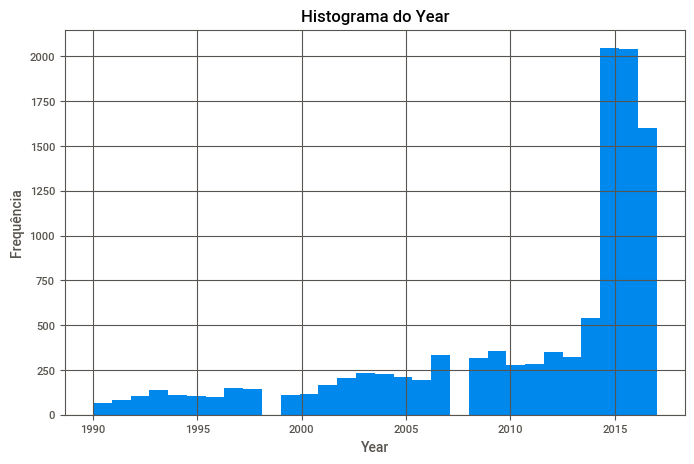

In [163]:
# Figura principal
plt.subplots(figsize=(8, 5))

plt.hist(df['Year'], bins=30)
plt.xlabel('Year')
plt.ylabel('Frequência')
plt.title('Histograma do Year')
plt.grid(True)

plt.show()

#### Plotando o histograma do atributo 'HP'

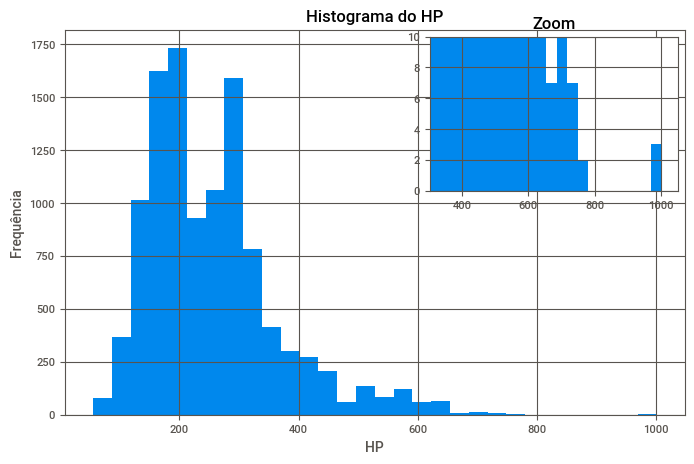

In [164]:
# Figura principal
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df['HP'], bins=30)
ax.set_xlabel('HP')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do HP')
ax.grid(True)

# --- INSET (zoom) ---
ax_inset = inset_axes(
    ax,
    width="40%",   # largura do inset
    height="40%",  # altura do inset
    loc="upper right"
)

# Intervalo menor
ax_inset.hist(
    df['HP'],
    bins=30
)

ax_inset.set_xlim(303, 1050)
ax_inset.set_ylim(0, 10)
ax_inset.set_title('Zoom')
ax_inset.grid(True)

plt.show()

#### Plotando o histograma do atributo 'Cylinders'

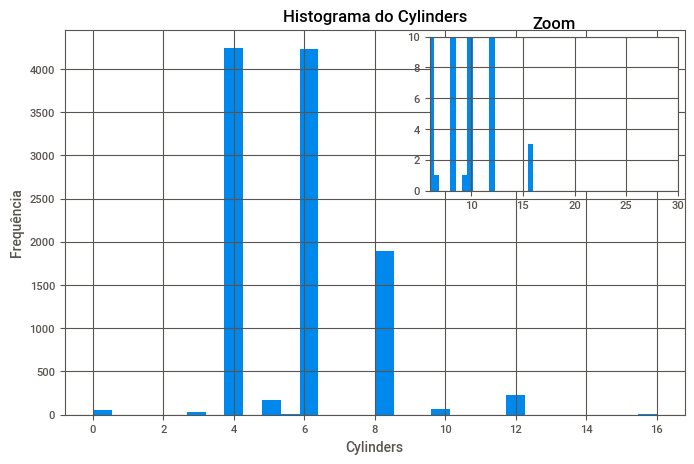

In [165]:
# Figura principal
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df['Cylinders'], bins=30)
ax.set_xlabel('Cylinders')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do Cylinders')
ax.grid(True)

# --- INSET (zoom) ---
ax_inset = inset_axes(
    ax,
    width="40%",   # largura do inset
    height="40%",  # altura do inset
    loc="upper right"
)

# Intervalo menor
ax_inset.hist(
    df['Cylinders'],
    bins=30
)

ax_inset.set_xlim(6, 30)
ax_inset.set_ylim(0, 10)
ax_inset.set_title('Zoom')
ax_inset.grid(True)

plt.show()

#### Plotando o histograma do atributo 'MPG-H'

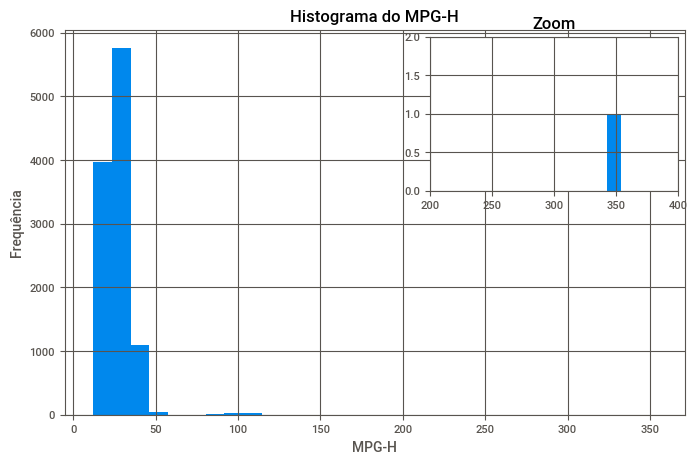

In [166]:
# Figura principal
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df['MPG-H'], bins=30)
ax.set_xlabel('MPG-H')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do MPG-H')
ax.grid(True)

# --- INSET (zoom) ---
ax_inset = inset_axes(
    ax,
    width="40%",   # largura do inset
    height="40%",  # altura do inset
    loc="upper right"
)

# Intervalo menor
ax_inset.hist(
    df['MPG-H'],
    bins=30
)

ax_inset.set_xlim(200, 400)
ax_inset.set_ylim(0, 2)
ax_inset.set_title('Zoom')
ax_inset.grid(True)

plt.show()


#### Plotando o histograma do atributo 'MPG-C'

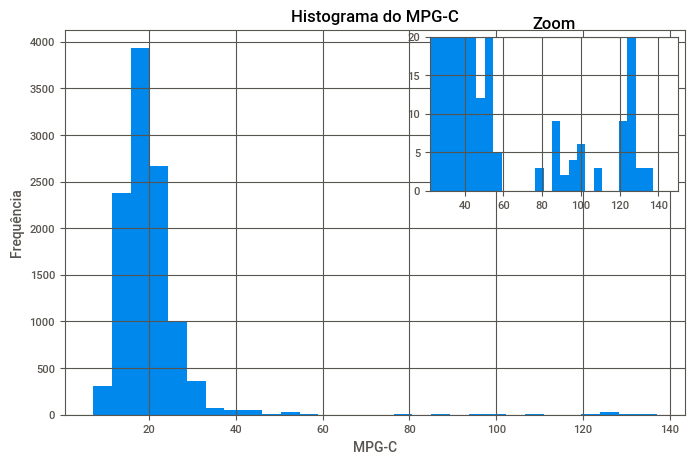

In [167]:
# Figura principal
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df['MPG-C'], bins=30)
ax.set_xlabel('MPG-C')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do MPG-C')
ax.grid(True)

# --- INSET (zoom) ---
ax_inset = inset_axes(
    ax,
    width="40%",   # largura do inset
    height="40%",  # altura do inset
    loc="upper right"
)

# Intervalo menor
ax_inset.hist(
    df['MPG-C'],
    bins=30
)

ax_inset.set_xlim(22, 150)
ax_inset.set_ylim(0, 20)
ax_inset.set_title('Zoom')
ax_inset.grid(True)

plt.show()


#### Plotando o histograma do atributo 'Price'

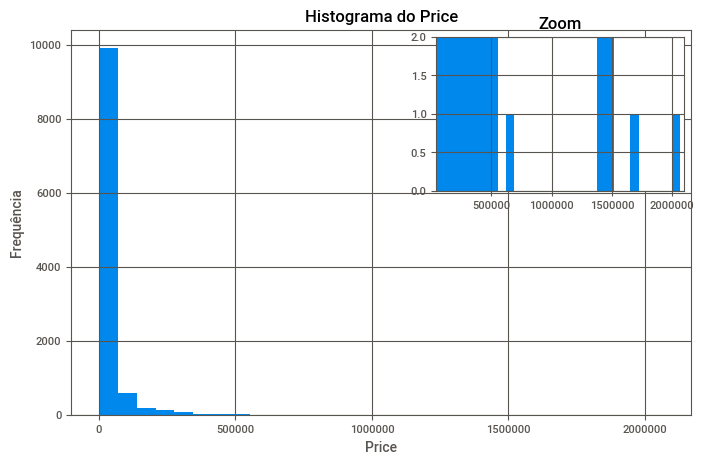

In [168]:
# Figura principal
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(df['Price'], bins=30)
ax.set_xlabel('Price')
ax.set_ylabel('Frequência')
ax.set_title('Histograma do Price')
ax.grid(True)

# --- INSET (zoom) ---
ax_inset = inset_axes(
    ax,
    width="40%",   # largura do inset
    height="40%",  # altura do inset
    loc="upper right"
)

# Intervalo menor
ax_inset.hist(
    df['Price'],
    bins=30
)

ax_inset.set_xlim(4.330000e+04, 2.1e+06)
ax_inset.set_ylim(0, 2)
ax_inset.set_title('Zoom')
ax_inset.grid(True)

plt.show()


**Com os histogramas, não temos uma ideia muita clara se os valores são *outliers* ou não**.

**Vamos usar *boxplot* para ter uma ideia mais clara**.

### Boxplot

#### Plotando o boxplot do atributo 'Year'

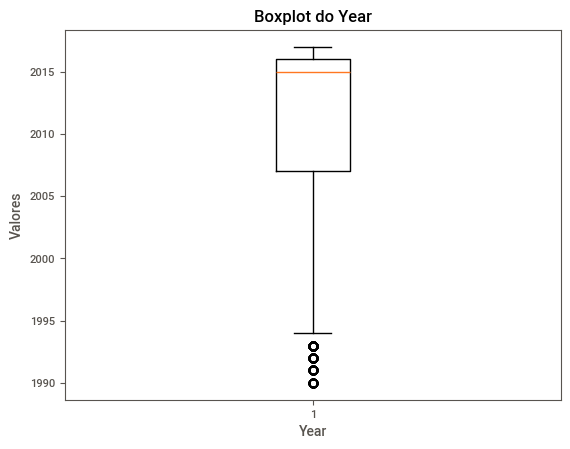

In [169]:
plt.boxplot(df['Year'])
plt.xlabel('Year')
plt.ylabel('Valores')
plt.title('Boxplot do Year')
plt.show()

**Existem *outliers* no atributo Year?**

Do ponto de vista estatístico, podemos dizer que existem outliers segundo o critério da distância interquartil (1.5 * IQR).

Mas isso não significa que eles são erros.

Esses *outliers* são veículos mais antigos, mas não são erros, pois existem veículos fabricados em 1990.

Esses *outliers* representam uma cauda temporal legítima e não devem ser removidos.

#### Plotando o boxplot do atributo 'HP'

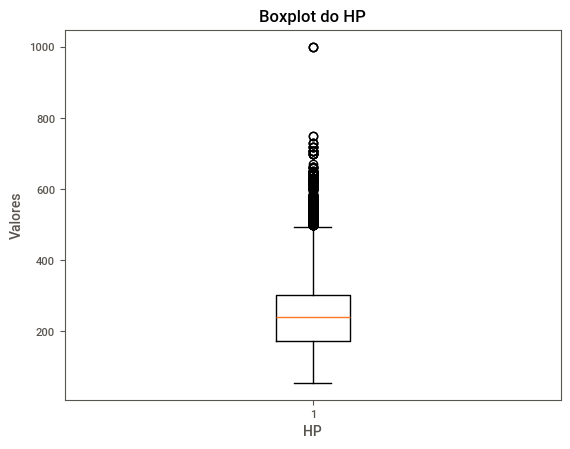

In [170]:
plt.boxplot(df['HP'])
plt.xlabel('HP')
plt.ylabel('Valores')
plt.title('Boxplot do HP')
plt.show()

**Existem *outliers* no atributo HP?**

Do ponto de vista estatístico, podemos dizer que existem outliers segundo o critério da distância interquartil (1.5 * IQR).

Mas isso não significa que eles são erros.

Esses *outliers* são veículos superesportivos, versões especiais, carros de luxo, mas não são erros.

Eles representam carros raros e extremos (cauda longa da distribuição), mas reais e não devem ser removidos.

#### Plotando o boxplot do atributo 'Cylinders'

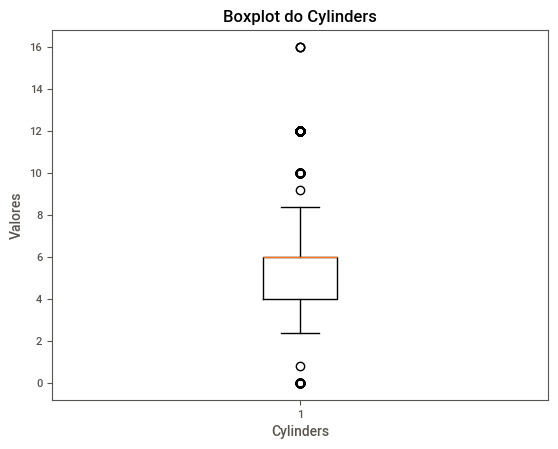

In [171]:
plt.boxplot(df['Cylinders'])
plt.xlabel('Cylinders')
plt.ylabel('Valores')
plt.title('Boxplot do Cylinders')
plt.show()

**Existem *outliers* no atributo Cylinders?**

Do ponto de vista estatístico, podemos dizer que existem outliers segundo o critério da distância interquartil (1.5 * IQR).

Valores altos (9, 10, 12, 16) são plausíveis, pois pertencem a carros com motor V10, V12 e V16 (supercarros e carros de luxo). São carros raros, mas reais.

Valores baixos (0 e 1) são suspeitos.
+ 1 cilindro: extremamente raro, mas possível (veículos muito específicos)
+ 0 cilindros: muito suspeito, pois pode indicar: carro elétrico, erro de preenchimento ou valor faltante codificado como 0.

Veredito: remover valores 0 e 1.

#### Plotando o boxplot do atributo 'MPG-H'

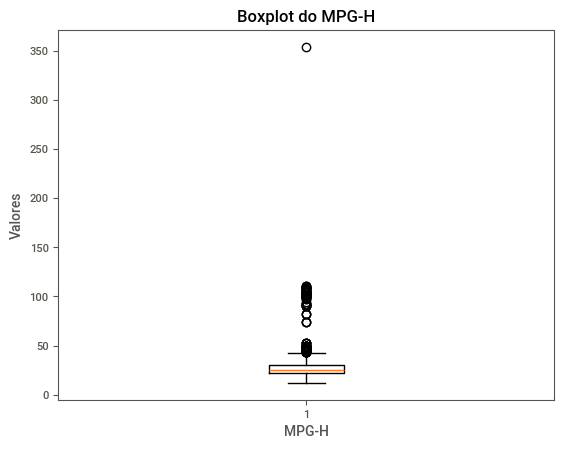

In [172]:
plt.boxplot(df['MPG-H'])
plt.xlabel('MPG-H')
plt.ylabel('Valores')
plt.title('Boxplot do MPG-H')
plt.show()

**Existem *outliers* no atributo MPG-H?**

Do ponto de vista estatístico, podemos dizer que existem outliers segundo o critério da distância interquartil (1.5 * IQR).

Valores moderadamente altos (50–120 MPG) podem ser plausíveis, dependendo do tipo de veículo: híbridos, veículos muito eficientes, condições específicas de medição.

Valores extremamente altos (> 120 MPG) são altamente suspeitos. Eles estão muito fora da escala física esperada. Eles normalmente indicam: erro de registro, conversão incorreta de unidades, valor agregado / estimado, dado corrompido.

Veredito: Como os dados são antigos, eles não contemplam dados de carros elétricos, portanto, devemos remover valores maiores do que 50 MPG. Além disso, mesmo sendo o consumo na estrada, carros a combustão apresentam MPG inferior a 50.

#### Plotando o boxplot do atributo 'MPG-C'

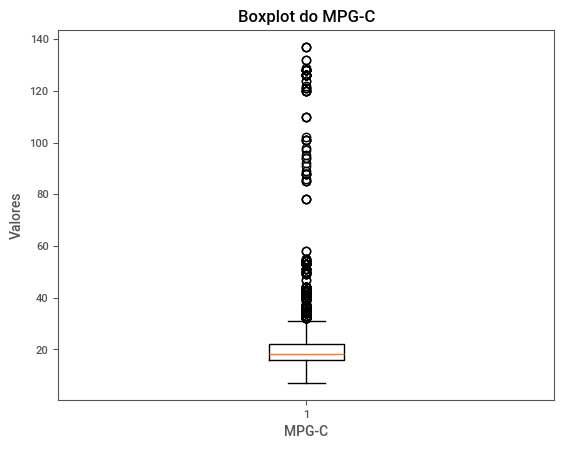

In [173]:
plt.boxplot(df['MPG-C'])
plt.xlabel('MPG-C')
plt.ylabel('Valores')
plt.title('Boxplot do MPG-C')
plt.show()

**Existem *outliers* no atributo MPG-C?**

Do ponto de vista estatístico, podemos dizer que existem outliers segundo o critério da distância interquartil (1.5 * IQR).

Valores moderadamente altos (30–50 MPG) podem ser plausíveis, dependendo do tipo de veículo: híbridos, veículos muito eficientes, condições específicas de medição.

Valores extremamente altos (> 50 MPG) são altamente suspeitos. Eles estão muito fora da escala física esperada para consumo na cidade. Eles normalmente indicam: erro de registro, conversão incorreta de unidades, valor agregado / estimado, dado corrompido.

Veredito: Como os dados são antigos, eles não contemplam dados de carros elétricos, portanto, devemos remover valores maiores do que 50 MPG. Além disso, mesmo sendo o consumo na cidade, carros a combustão apresentam MPG inferior a 50.

#### Plotando o boxplot do atributo 'Price'

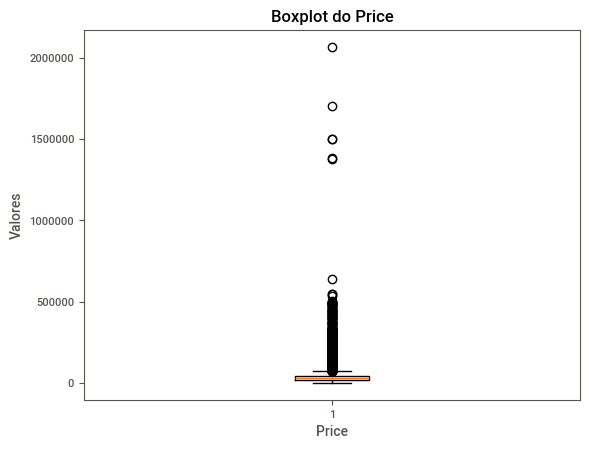

In [174]:
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.ylabel('Valores')
plt.title('Boxplot do Price')
plt.show()

**Existem *outliers* no atributo Price?**

Do ponto de vista estatístico, podemos dizer que existem outliers segundo o critério da distância interquartil (1.5 * IQR).

O dataset contém desde carros populares e de entrada até modelos de luxo e exóticos. Alguns exemplos do *dataset*:
+ BMW 1 Series: Na casa dos \$30.000 - \$45.000
+ BMW Z8: Saltando para \$130.000
+ Bugatti Veyron: custando mais de \$2.000.000

Esses valores são de carros de luxo, mas reais e não devem ser removidos.

O histograma mostra uma "cauda" longa que se estende para a direita (distribuição com assemetria positiva).

Veredito: mantê-los.

### Z-score

**Vamos plotar o gráfico que usa o *z-score* para identificar *outliers* para apenas um atributo.**

**Usaremos o atributo *MPG-C*, pois é o que tem a distribuição mais próxima à normal.**

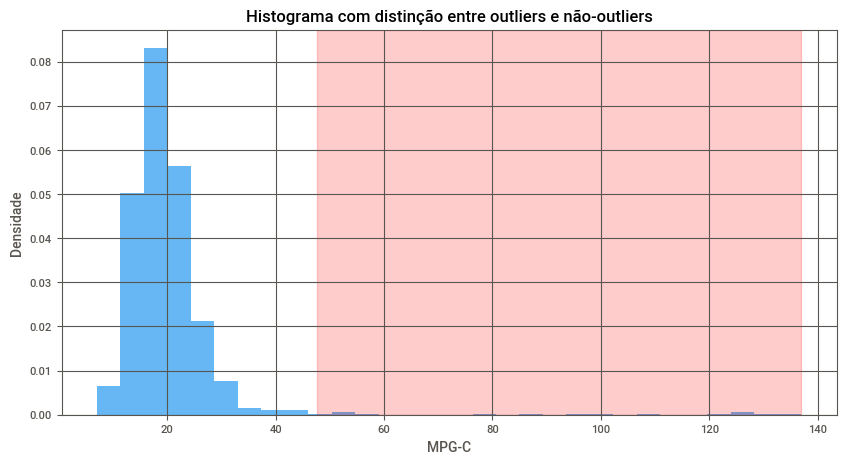

In [175]:
plt.figure(figsize = (10,5))

# Plota a distribuição dos dados
plt.hist(df['MPG-C'], bins=30, density=True, alpha=0.6)

# Calcula a média e o desvio padrão dos dados
data_mean, data_std = df['MPG-C'].mean(), df['MPG-C'].std()

# Calcula o valor de corte
cut_off = data_std * 3

# Calcula os valores dos limites inferior e superior
lower, upper = data_mean - cut_off, data_mean + cut_off

# Plotando as regiões onde os outliers estão
if(df['MPG-C'].min() < lower):
    plt.axvspan(xmin=df['MPG-C'].min(), xmax=lower, alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=df['MPG-C'].max(), alpha=0.2, color='red')

plt.xlabel('MPG-C')
plt.ylabel('Densidade')
plt.title('Histograma com distinção entre outliers e não-outliers')
plt.grid()

plt.show()

## 11. Removendo *outliers*

### Removendo *outliers* do atributo `MPG-H` usando IQR.

In [176]:
Q1 = df['MPG-H'].quantile(0.25)
Q3 = df['MPG-H'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_sem_outliers_iqr = df[
    (df['MPG-H'] >= lim_inf) &
    (df['MPG-H'] <= lim_sup)
]

Boxplot do atributo `MPG-H` sem *outliers*.

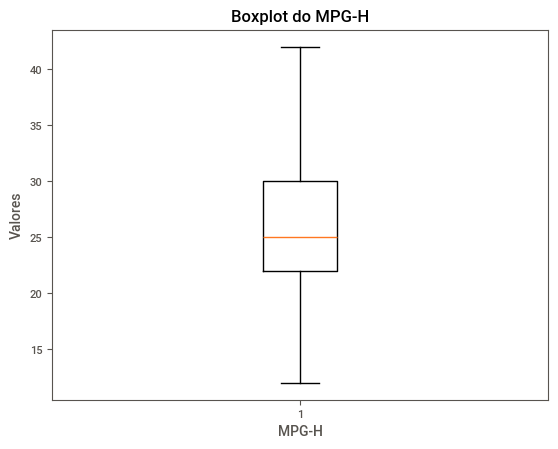

In [177]:
plt.boxplot(df_sem_outliers_iqr['MPG-H'])
plt.xlabel('MPG-H')
plt.ylabel('Valores')
plt.title('Boxplot do MPG-H')
plt.show()

### Removendo *outliers* do atributo `MPG-H` usando Z-score.

In [178]:
z = np.abs(stats.zscore(df['MPG-H']))
df_sem_outliers_z = df[z < 3]

Histograma do atributo `MPG-H` sem *outliers*.

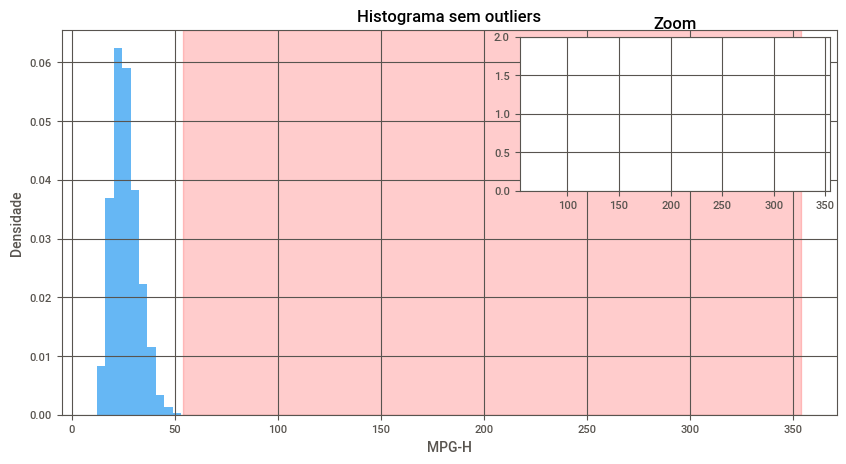

In [179]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plota a distribuição dos dados
ax.hist(df_sem_outliers_z['MPG-H'], density=True, alpha=0.6)

# Calcula a média e o desvio padrão dos dados
data_mean, data_std = df['MPG-H'].mean(), df['MPG-H'].std()

# Calcula o valor de corte
cut_off = data_std * 3

# Calcula os valores dos limites inferior e superior
lower, upper = data_mean - cut_off, data_mean + cut_off

# Plotando as regiões onde os outliers estão
if(df['MPG-H'].min() < lower):
    ax.axvspan(xmin=df['MPG-H'].min(), xmax=lower, alpha=0.2, color='red')
ax.axvspan(xmin=upper, xmax=df['MPG-H'].max(), alpha=0.2, color='red')

ax.set_xlabel('MPG-H')
ax.set_ylabel('Densidade')
ax.set_title('Histograma sem outliers')
ax.grid(True)

# --- INSET (zoom) ---
ax_inset = inset_axes(
    ax,
    width="40%",   # largura do inset
    height="40%",  # altura do inset
    loc="upper right"
)

# Intervalo menor
ax_inset.hist(
    df_sem_outliers_z['MPG-H'],
    bins=30
)

ax_inset.set_xlim(upper, df['MPG-H'].max())
ax_inset.set_ylim(0, 2)
ax_inset.set_title('Zoom')
ax_inset.grid(True)

plt.show()

### Aplicando a distância interquartil (IQR) em várias colunas numéricas

Dimensões do *dataset* antes da remoção dos *outliers*

In [180]:
df.shape

(10925, 10)

In [181]:
num_cols = df.select_dtypes(include='number').columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_sem_outliers_iqr = df[
    ~((df[num_cols] < (Q1 - 1.5 * IQR)) |
      (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]

Dimensões do *dataset* após a remoção dos *outliers*

In [182]:
df_sem_outliers_iqr.shape

(9230, 10)

## 12. Relação entre variáveis

### Mariz de correlação (*heatmap*)

#### Usando o coeficiente de Pearson.

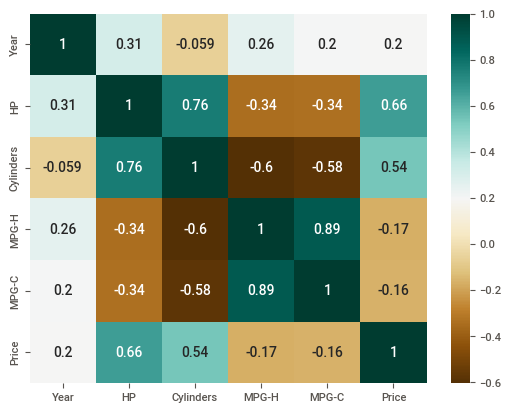

In [183]:
corr = df.corr(method='pearson', numeric_only=True)

plt.figure()
sns.heatmap(corr, cmap="BrBG", annot=True)
plt.show()

No mapa de calor acima, podemos ver que o preço depende principalmente da potência (em cavalos) e do número de cilindros.

### Diagrama de dispersão (*scatterplot*)

Geralmente, usamos diagramas de dispersão para encontrar a correlação entre duas variáveis.

#### Diagrama de dispersão entre a potência (`HP`) e o preço (`Price`).

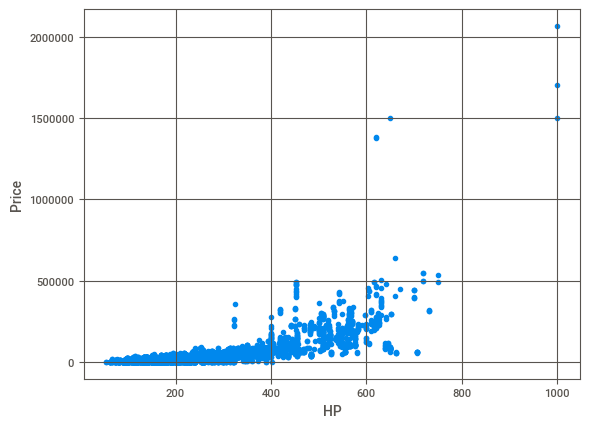

In [184]:
fig, ax = plt.subplots()
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
ax.grid(True)
plt.show()

Existe uma relação entre as duas variáveis, mas nitidamente não é linear.

Se o valor de uma variável aumenta, a outra tende a aumentar, não na mesma taxa, mas aumenta.

#### Diagrama de dispersão entre a número de cilindros (`Cylinders`) e o preço (`Price`).

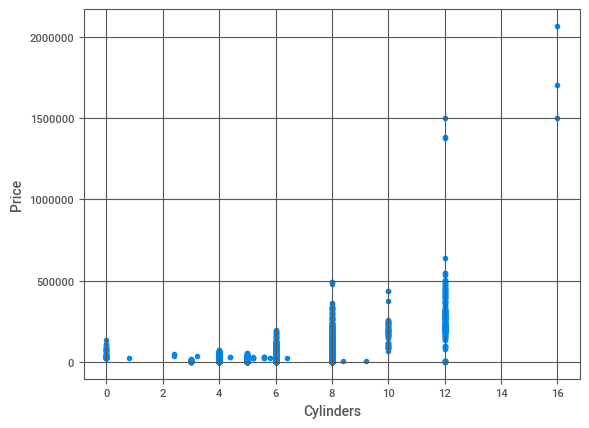

In [185]:
fig, ax = plt.subplots()
ax.scatter(df['Cylinders'], df['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
ax.grid(True)
plt.show()

Se o valor de uma variável aumenta, a outra tende a aumentar, não na mesma taxa, mas aumenta.

#### Diagrama de dispersão entre o preço (`Price`) e o consumo (milhas por galão) na cidade (`MPG-C`).

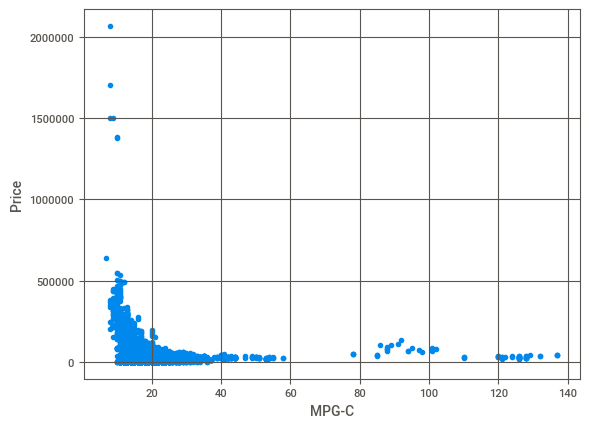

In [186]:
fig, ax = plt.subplots()
ax.scatter(df['MPG-C'], df['Price'])
ax.set_xlabel('MPG-C')
ax.set_ylabel('Price')
ax.grid(True)
plt.show()

O coeficiente de Pearson é negativo e pequeno.

Não tem uma relação linear.

Se assemelha a um comportamento exponencial.

#### Diagrama de dispersão entre o consumo (`MPG-H`) na estrada e o consumo na cidade (`MPG-C`).

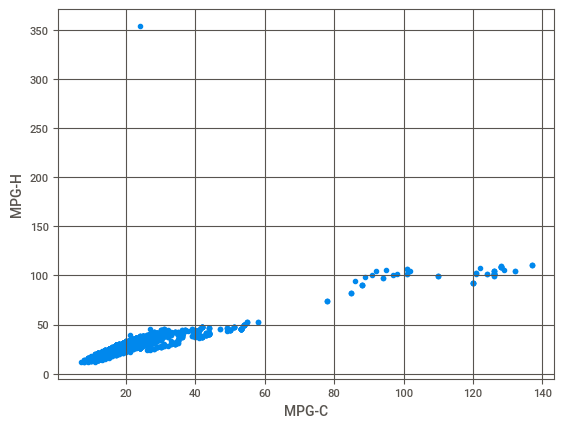

In [187]:
fig, ax = plt.subplots()
ax.scatter(df['MPG-C'], df['MPG-H'])
ax.set_xlabel('MPG-C')
ax.set_ylabel('MPG-H')
ax.grid(True)
plt.show()

Coeficiente de Pearson é alto.

A relação é bastante linear, o que é esperado.

Presença de *outlier* : `MPG-H` $\approx$ 350.

#### Usando o coeficiente de Spearman.

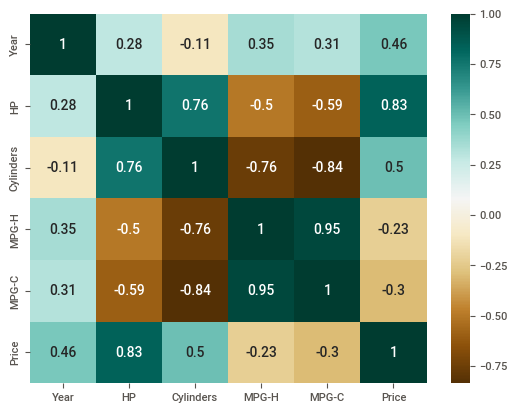

In [188]:
corr = df.corr(method='spearman', numeric_only=True)

plt.figure()
sns.heatmap(corr, cmap="BrBG", annot=True)
plt.show()

Coeficiente de Spearman é mais alto para a relação entre `Price` e `MPG-C`.

Indicação de relação não-linear, como discutido anteriormente.



### *Pairplot* (ou matriz *scatterplot*)

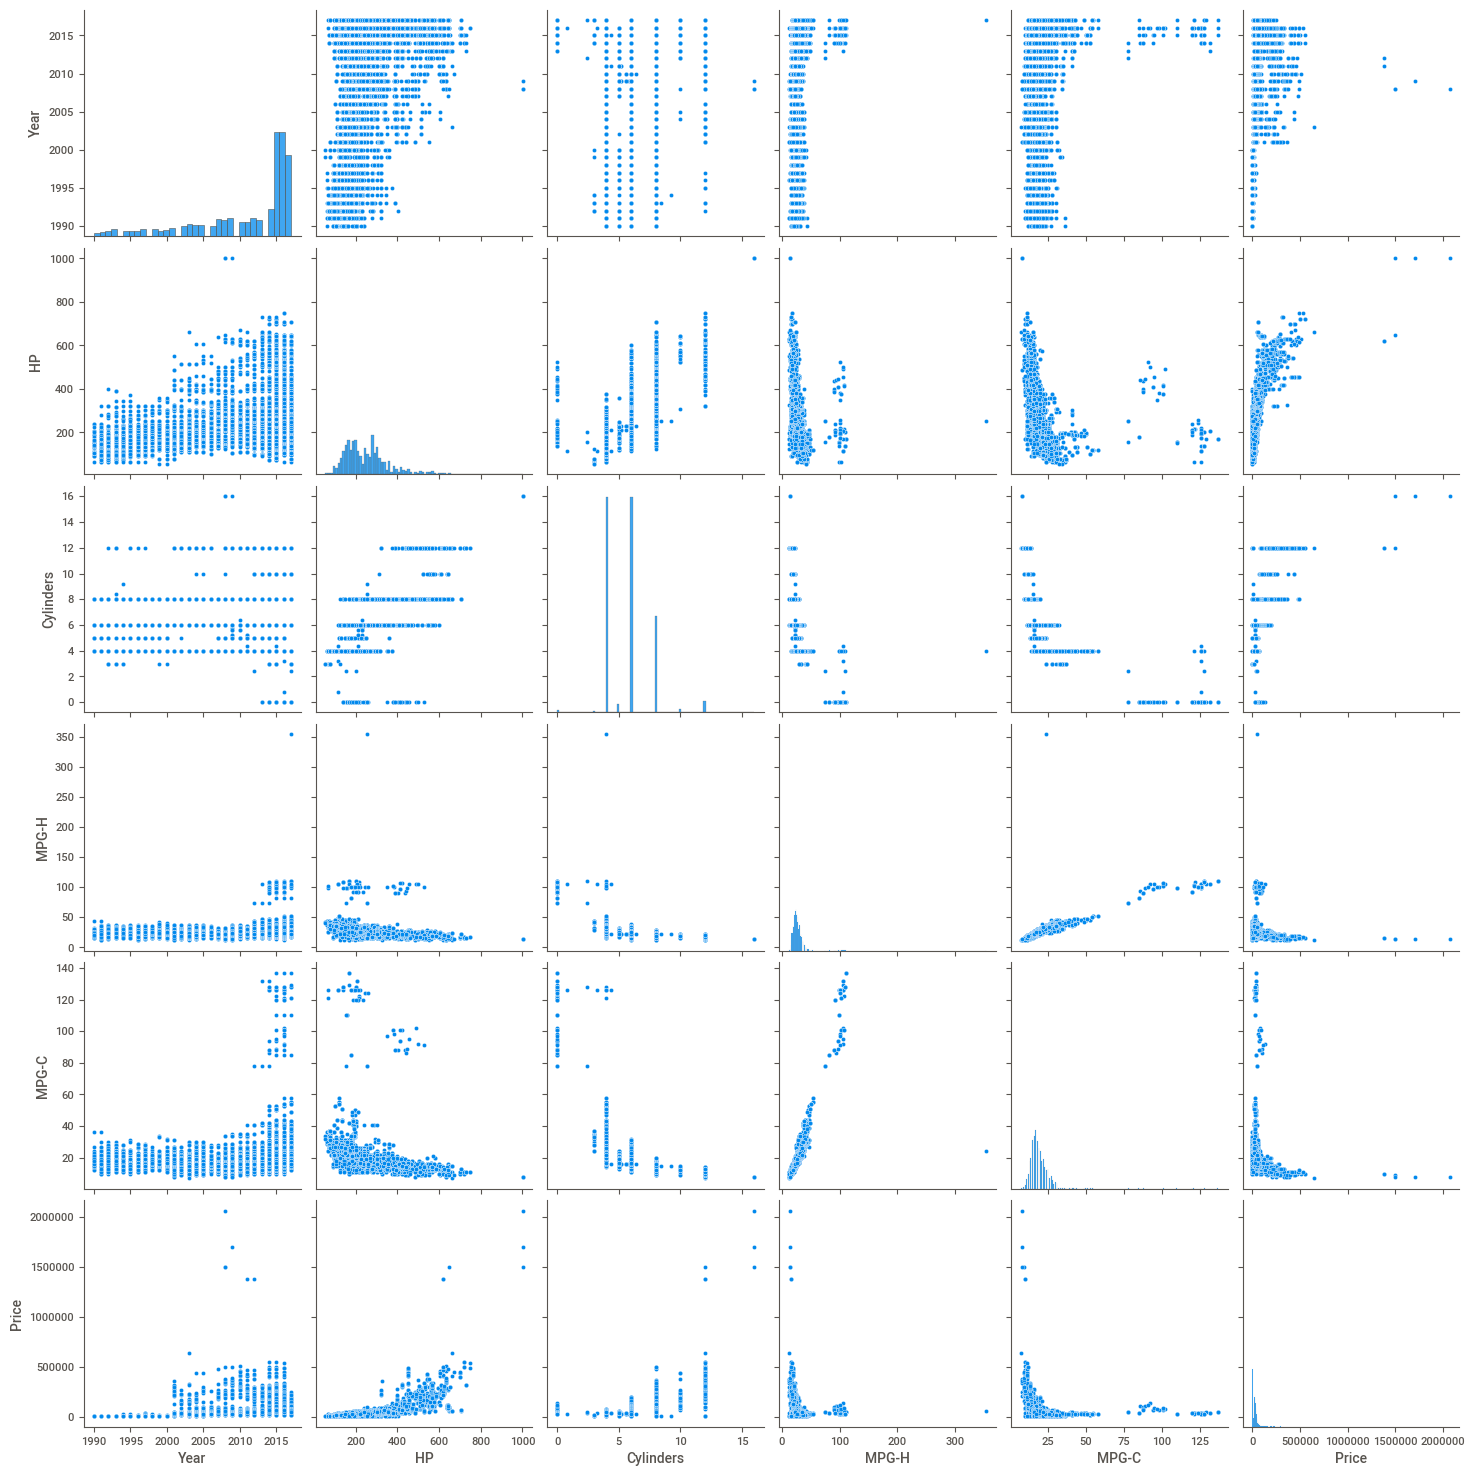

In [189]:
sns.pairplot(df)
plt.show()

## 13. Pandas Profiling

In [190]:
# Instalando a biblioteca.
!pip install ydata-profiling

In [191]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Relatório de Análise de Dados")
profile.to_file("relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:01<00:00,  9.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [192]:
profile.to_notebook_iframe()


**Estes foram alguns dos passos que vocês devem seguir para realizar uma análise exploratória de dados (EDA).**

**Existem outros passos, mas estes são mais do que suficientes para ter uma boa ideia de como realizar uma EDA com qualquer conjunto de dados.**